In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.ntheory.residue_ntheory import n_order as order

%cd /home/simone/Desktop/DSSC/tirocinio/results/allY_arbitrary
from total import *

/home/simone/Desktop/DSSC/tirocinio/results/allY_arbitrary


In [2]:
N = [15, 21, 33, 35, 45, 51, 55, 57, 63, 69, 75, 77, 85,87, 93, 95, 105, 111, 115, 119, 123,129]

In [3]:
entropies = [S_15, S_21, S_33, S_35, S_45, S_51, S_55, S_57, S_63, S_69, S_75, S_77, S_85, 
             S_87, S_93, S_95, S_105, S_111, S_115, S_119, S_123, S_129]

Y = [Y_15, Y_21,Y_33, Y_35, Y_45, Y_51, Y_55, Y_57, Y_63, Y_69, Y_75, Y_77, Y_85, 
             Y_87, Y_93, Y_95, Y_105, Y_111, Y_115, Y_119, Y_123, Y_129]

print(S_95[9] - S_111[7])

-0.26071278032069944


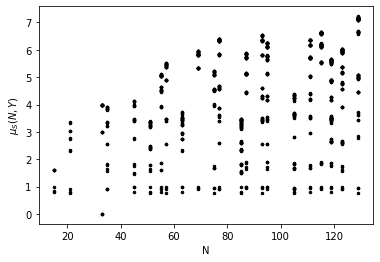

In [4]:
idx_max = []

for i in range(len(entropies)):
    size = len(entropies[i])
    plt.plot([N[i]]*size, entropies[i], 'k.', markersize=5)
    idx_max.append(np.argmax(entropies[i]))

plt.xlabel("N")
plt.ylabel("$\mu_S(N,Y)$")
#plt.savefig('scatterplot_arbitrary',dpi=300)
plt.show()

In [12]:
max_Y = [int(Y[i][j]) for i,j in zip(range(len(Y)),idx_max)]
max_r = [order(max_Y[i],N[i]) for i in range(len(N))]
max_S = [entropies[i][j] for i,j in zip(range(len(Y)),idx_max)]

#hull_idx = [0,1,6,8,10,13,-1]
print(max_Y)
print(max_r)

[10, 2, 2, 22, 37, 53, 52, 50, 7, 37, 74, 31, 76, 79, 93, 37, 61, 53, 79, 106, 61]
[6, 10, 12, 12, 16, 20, 18, 6, 22, 20, 30, 16, 28, 30, 36, 12, 36, 44, 48, 40, 42]


21 3.3434184193623646 6
33 4 10
57 5.521747705665909 18
69 5.948020017318278 22
77 6.397225255223844 30
93 6.5393370358031495 30
129 7.227910999099751 42
[6, 10, 12, 12, 16, 20, 18, 6, 22, 20, 30, 16, 28, 30, 36, 12, 36, 44, 48, 40, 42]


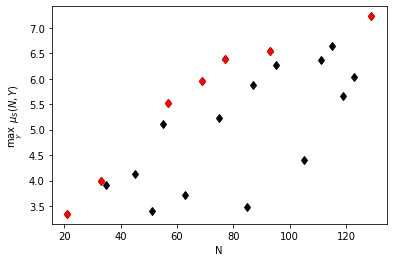

In [14]:
plt.plot(N, max_S, 'd', color='black')

x = []
y = []
for i in hull_idx:
    plt.plot(N[i], max_S[i], 'd', color='red')
    print(N[i], max_S[i],max_r[i])
    x.append(N[i])
    y.append(max_S[i])

print(max_r)
plt.xlabel("N")
plt.ylabel("$\max_Y \,\, \mu_S(N,Y)$")
#plt.savefig('convex_hull_arbitrary', dpi=300)
plt.show()

Text(0, 0.5, '$\\hat{S}$(N)')

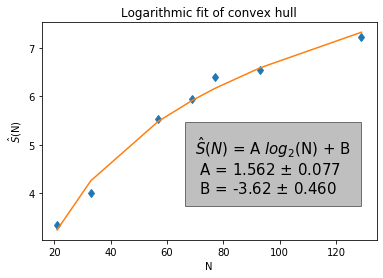

In [49]:
import scipy.optimize as opt

def f(x, a, c):
    return a * np.log2(x) + c

params, pcov = opt.curve_fit(f, x, y, p0=[1,1])
perr = np.sqrt(np.diag(pcov))

y_fit = f(x, params[0], params[1])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'd')
ax.plot(x, y_fit, '-')
ax.set_title('Logarithmic fit of convex hull')
params = [str(p)[:5] + " $\pm$ " + str(err)[:5] for p,err in zip(params, perr)]
string ="A $log_2$(N) + B\n A = "+params[0]+"\n B = "+params[1]#+"\n C = "+params[2]   
#\\frac{{{}}}{{1+e^{{-{}(k-{})}}}}".format(a_[:4],c_[:4],d_[:4])
ax.text(70, 4, "$\hat{S}(N)$ = "+string, style='normal', fontsize=15, 
bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.set_xlabel('N')
ax.set_ylabel('$\hat{S}$(N)')

# Visualization
#plt.scatter(2**(x), y)
#plt.plot(2**(x), y_fit, "k--", label="Fit")
#plt.xlabel('N')
#plt.ylabel('$\hat{\mu}_S(N)$')
#plt.plot(np.array([N[i] for i in hull_idx]), m*np.log2(np.array([N[i] for i in hull_idx]))+q, 'o',color='red')

#plt.text(60, 3.5, "$\\hat{S}(N) = $" + str(m)[:4] + " log$_2$(N) " +str(q)[:5], style='normal', fontsize=15, 
#    bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
#plt.title("Logarithmic Fit")
#plt.savefig('failed_logarithmic_fit_hull_arbitrary', dpi=300)